# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int32


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

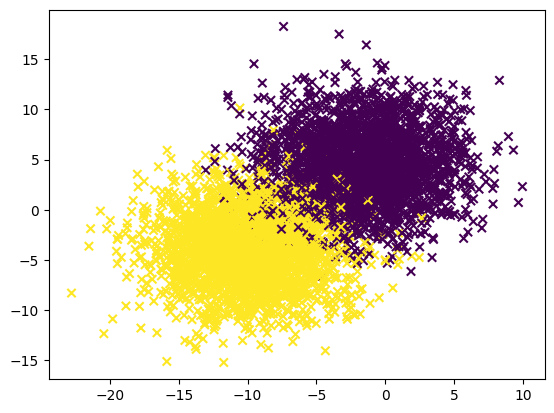

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Additional Task: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Additional Task: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution

In [5]:
X_ = np.c_[X, np.ones(X.shape[0])] # Add a column of ones to X for the bias term

weights = np.linalg.pinv(X_.T @ X_) @ X_.T @ y # Treat the labels (0 or 1) as regression targets and solve for weights

scores = X_ @ weights # Get regression scores for classification

y_pred = np.where(scores >= 0.5, 1, 0) # Assign class labels based on scores: closer to 0 => class 0, closer to 1 => class 1

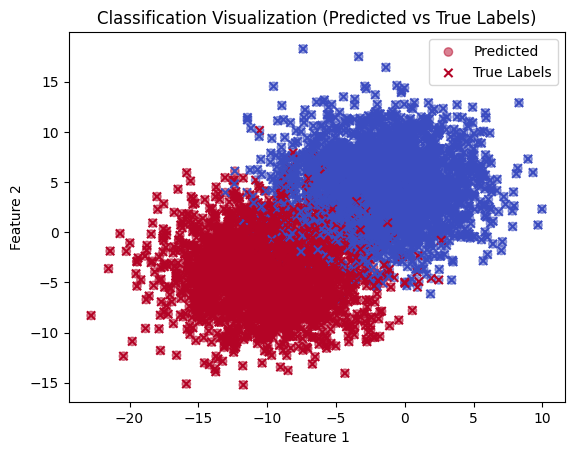

In [6]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="o", cmap="coolwarm", alpha=0.5, label="Predicted")
plt.scatter(X[:, 0], X[:, 1], c=y, marker="x", cmap="coolwarm", label="True Labels")
plt.title("Classification Visualization (Predicted vs True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
accuracy = np.mean(y == y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 95.86%


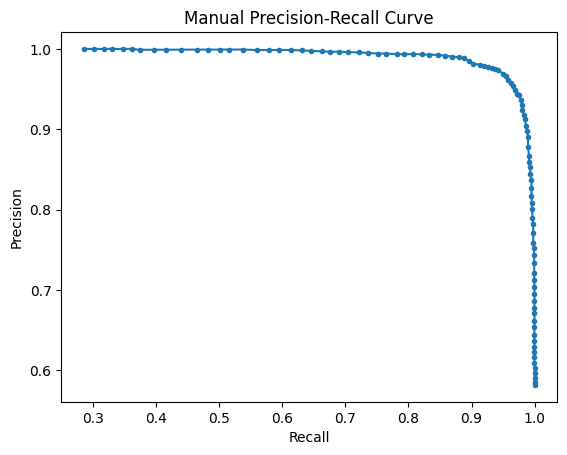

In [8]:
# Calculate true positives, false positives, etc., and generate precision-recall points manually.
thresholds = np.linspace(0, 1, 100)
precisions_manual = []
recalls_manual = []

for threshold in thresholds:
    y_pred_threshold = np.where(scores >= threshold, 1, 0)
    tp = np.sum((y_pred_threshold == 1) & (y == 1))
    fp = np.sum((y_pred_threshold == 1) & (y == 0))
    fn = np.sum((y_pred_threshold == 0) & (y == 1))

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    precisions_manual.append(precision)
    recalls_manual.append(recall)

# Plot manual Precision-Recall Curve
plt.figure()
plt.plot(recalls_manual, precisions_manual, marker=".")
plt.title("Manual Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2500
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



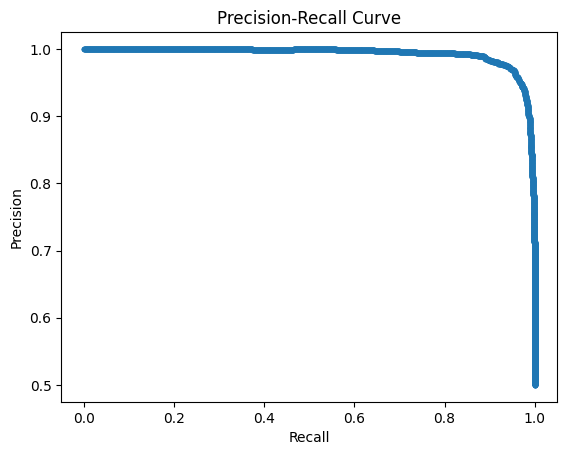

In [9]:
from sklearn.metrics import classification_report, precision_recall_curve
print(classification_report(y, y_pred)) # Classification report using sklearn

# Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(y, scores)

plt.figure()
plt.plot(recalls, precisions, marker=".")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()